# Calculating the Converstion Rate in a Fictional Dataset
In the other document we went over some basic analysis and some data cleaning. 

Here we can do some deeper analysis that would be relevant in a marketing setting - namely conversion rate and retention rate.

In [1]:
# imports the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# imports the cleaned csv file from the other python notebook
marketing = pd.read_csv("marketing_clean.csv", parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           10022 non-null  int64         
 1   user_id              10022 non-null  object        
 2   date_served          10021 non-null  datetime64[ns]
 3   marketing_channel    10022 non-null  object        
 4   variant              10022 non-null  object        
 5   converted            10022 non-null  bool          
 6   language_displayed   10022 non-null  object        
 7   language_preferred   10022 non-null  object        
 8   age_group            10022 non-null  object        
 9   date_subscribed      1856 non-null   datetime64[ns]
 10  date_canceled        577 non-null    datetime64[ns]
 11  subscribing_channel  1856 non-null   object        
 12  is_retained          1856 non-null   object        
dtypes: bool(1), datetime64[ns](3), 

In [3]:
print(marketing.head())

   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel is_retained  
0      2018-01-01           NaT           House Ads        True  
1      2

From the other python notebook we noticed that the dates in the dataset run from 2018-01-01 to 2018-01-31. So we do not need any additional slicing based on time at this time. (of course unless we want to see the conversion and retention in terms of weeks)

In [4]:
# calculates conversion rate
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()

conv_rate = subscribers/total
print(round(conv_rate*100, 2),'%')

13.92 %


In [5]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


It makes sense to segregate by groups to see conversion across groups then.

In [16]:
# segregating subscribers by age groups
subscribers = marketing[marketing['converted'] == True].groupby('age_group')['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

age_group
0-18 years     2.632301
19-24 years    4.154099
24-30 years    3.125857
30-36 years    1.055662
36-45 years    1.014532
45-55 years    1.028242
55+ years      1.041952
Name: user_id, dtype: float64


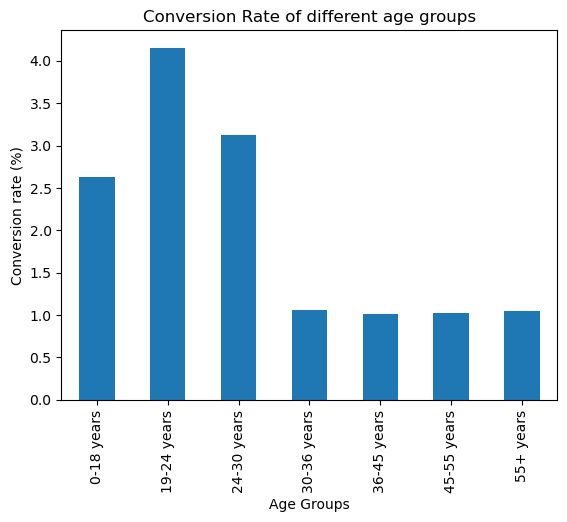

In [17]:
conv_rate.plot(kind='bar')

plt.title('Conversion Rate of different age groups')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Age Groups')
plt.show()

In [14]:
# segregating subscribers by marketing channel
subscribers = marketing[marketing['converted'] == True].groupby('marketing_channel')['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

marketing_channel
Email        2.563751
Facebook     3.029888
House Ads    4.085550
Instagram    3.180696
Push         1.055662
Name: user_id, dtype: float64


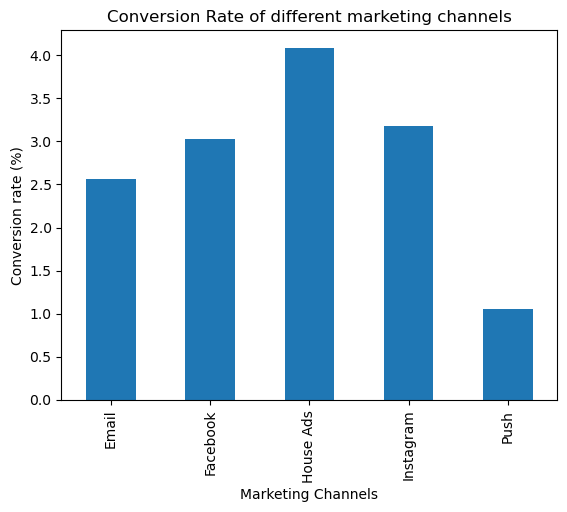

In [15]:
conv_rate.plot(kind='bar')

plt.title('Conversion Rate of different marketing channels')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Marketing Channels')
plt.show()

Let's see if we group by both age groups and marketing channels

In [19]:
subscribers = marketing[marketing['converted'] == True].groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

age_group    marketing_channel
0-18 years   Email                0.507266
             Facebook             0.603236
             House Ads            0.795174
             Instagram            0.520976
             Push                 0.205648
19-24 years  Email                0.671785
             Facebook             1.055662
             House Ads            0.795174
             Instagram            1.288730
             Push                 0.342747
24-30 years  Email                0.712915
             Facebook             0.658075
             House Ads            0.795174
             Instagram            0.685495
             Push                 0.274198
30-36 years  Email                0.178229
             Facebook             0.233068
             House Ads            0.425007
             Instagram            0.164519
             Push                 0.054840
36-45 years  Email                0.164519
             Facebook             0.178229
             House Ads 

In [20]:
# unstacking to plot
conv_rate_pd = pd.DataFrame(conv_rate.unstack(level=1))

conv_rate_pd.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,0.507266,0.603236,0.795174,0.520976,0.205648
19-24 years,0.671785,1.055662,0.795174,1.288730,0.342747
24-30 years,0.712915,0.658075,0.795174,0.685495,0.274198
30-36 years,0.178229,0.233068,0.425007,0.164519,0.054840
36-45 years,0.164519,0.178229,0.425007,0.205648,0.041130


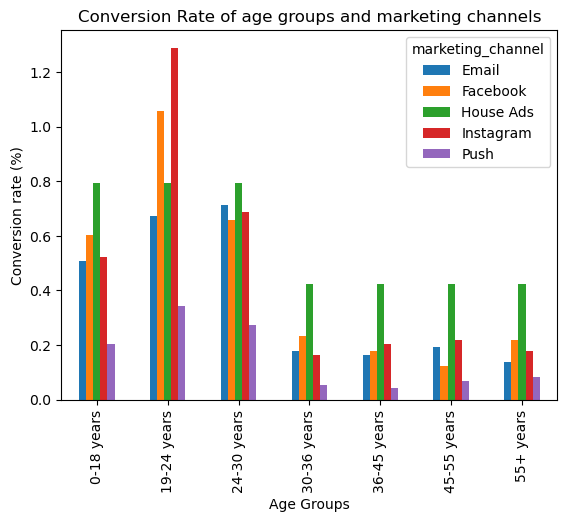

In [23]:
# plot this
conv_rate_pd.plot(kind='bar')
plt.title('Conversion Rate of age groups and marketing channels')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Age Groups')
plt.show()

It makes sense to have a look at conversion across time too.

Let's see the following:
1. Conversion across time
2. Conversion across time in terms of age groups
3. Conversion across time in temrs of marketing channels

Let's make a function for plotting the age groups and marketing channels in separate plots - since plotting everything into one plot will give an overview; but it's not so good for clarity.

In [42]:
# creating a function that plots multiple plots of the .groupby() method
def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' conversion rate')
        plt.ylabel('Conversion rate (%)')
        plt.xlabel('Date')
        
        plt.ylim(0)
        plt.show()

In [24]:
# segregating subscribers by time
subscribers = marketing[marketing['converted'] == True].groupby('date_served')['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

date_served
2018-01-01    0.493556
2018-01-02    0.507266
2018-01-03    0.493556
2018-01-04    0.479846
2018-01-05    0.548396
2018-01-06    0.479846
2018-01-07    0.534686
2018-01-08    0.493556
2018-01-09    0.534686
2018-01-10    0.548396
2018-01-11    0.342747
2018-01-12    0.315328
2018-01-13    0.356457
2018-01-14    0.356457
2018-01-15    1.192761
2018-01-16    1.357280
2018-01-17    1.110502
2018-01-18    0.397587
2018-01-19    0.246778
2018-01-20    0.287908
2018-01-21    0.274198
2018-01-22    0.301618
2018-01-23    0.287908
2018-01-24    0.301618
2018-01-25    0.315328
2018-01-26    0.274198
2018-01-27    0.287908
2018-01-28    0.274198
2018-01-29    0.260488
2018-01-30    0.287908
2018-01-31    0.246778
Name: user_id, dtype: float64


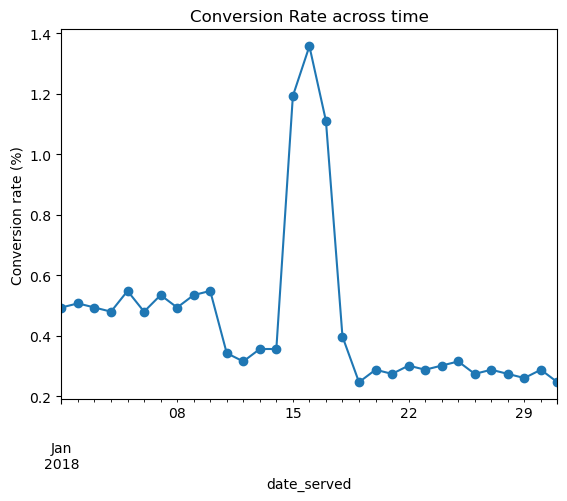

In [26]:
conv_rate.plot(kind='line', marker='o')

plt.title('Conversion Rate across time')
plt.ylabel('Conversion rate (%)')
plt.show()

In [33]:
# segregating subscribers by time and age groups
subscribers = marketing[marketing['converted'] == True].groupby(['date_served', 'age_group'])['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

date_served  age_group  
2018-01-01   0-18 years     0.123389
             19-24 years    0.164519
             24-30 years    0.082259
             30-36 years    0.027420
             36-45 years    0.027420
                              ...   
2018-01-31   19-24 years    0.082259
             24-30 years    0.041130
             36-45 years    0.027420
             45-55 years    0.013710
             55+ years      0.013710
Name: user_id, Length: 195, dtype: float64


In [38]:
# unstacking to plot
conv_rate_df = pd.DataFrame(conv_rate.unstack(level=1))

conv_rate_df.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.123389,0.164519,0.082259,0.02742,0.02742,0.01371,0.05484
2018-01-02,0.150809,0.164519,0.095969,0.02742,0.02742,0.02742,0.01371
2018-01-03,0.068549,0.191939,0.109679,0.02742,0.04113,0.02742,0.02742
2018-01-04,0.082259,0.137099,0.123389,0.02742,0.02742,0.04113,0.04113
2018-01-05,0.095969,0.191939,0.082259,0.05484,0.04113,0.02742,0.05484


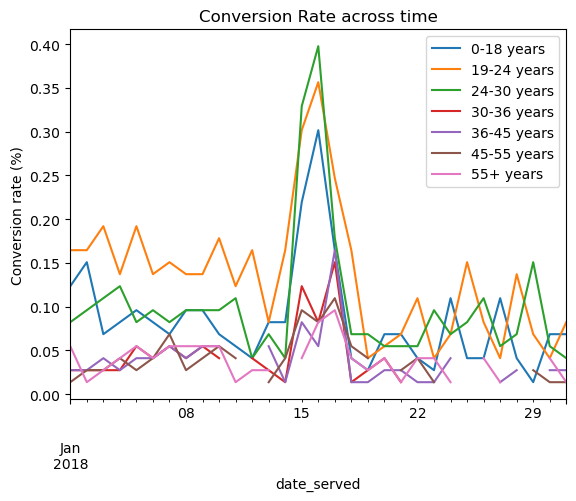

In [40]:
conv_rate_df.plot()

plt.title('Conversion Rate across time')
plt.ylabel('Conversion rate (%)')
plt.legend(loc='upper right', labels = conv_rate_df.columns.values)
plt.show()

This is an ok chart, but for clarity let's break it down into multiple plots

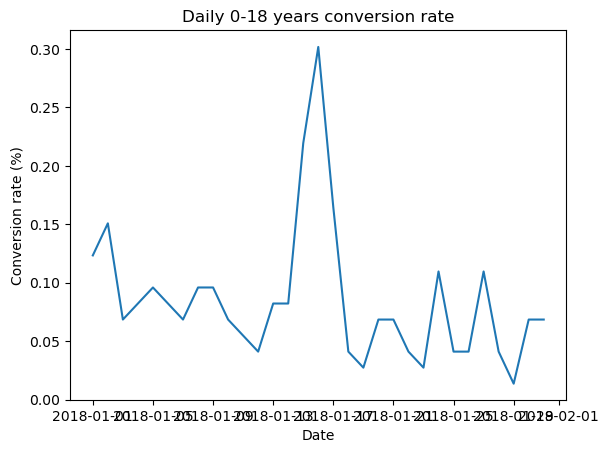

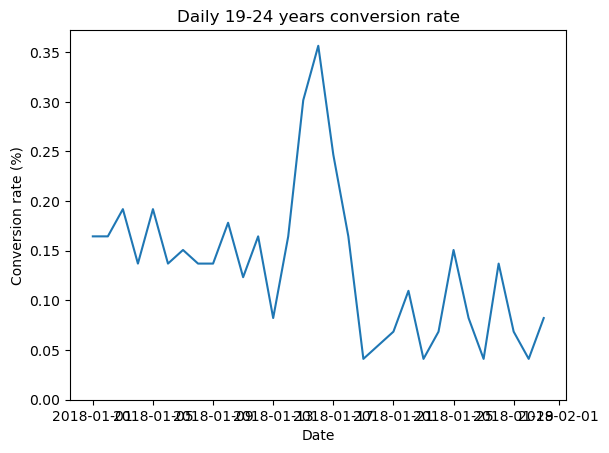

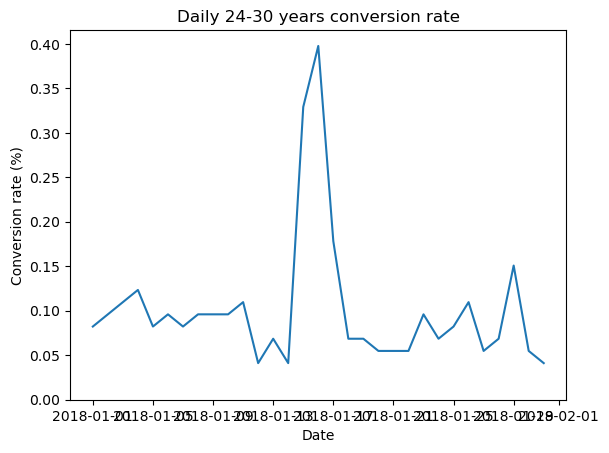

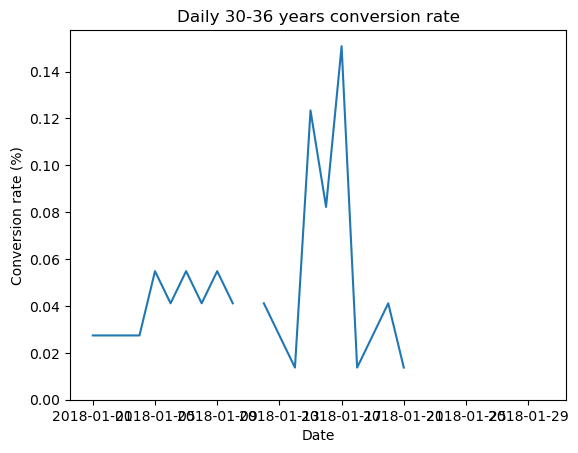

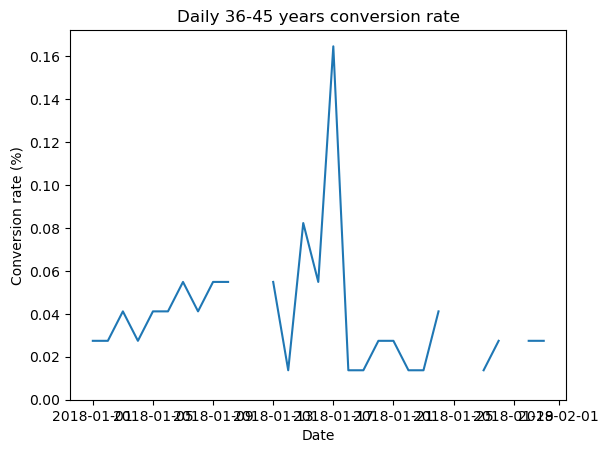

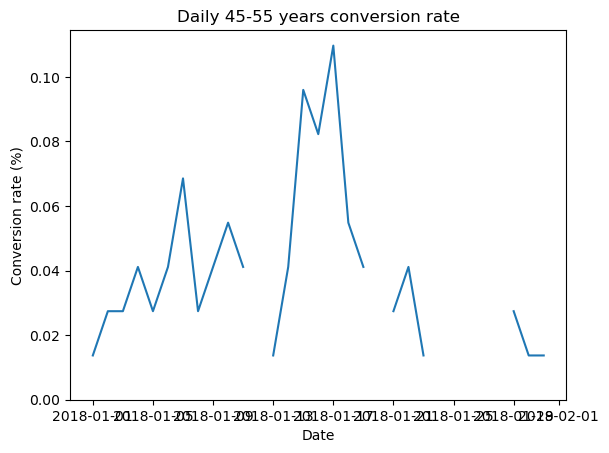

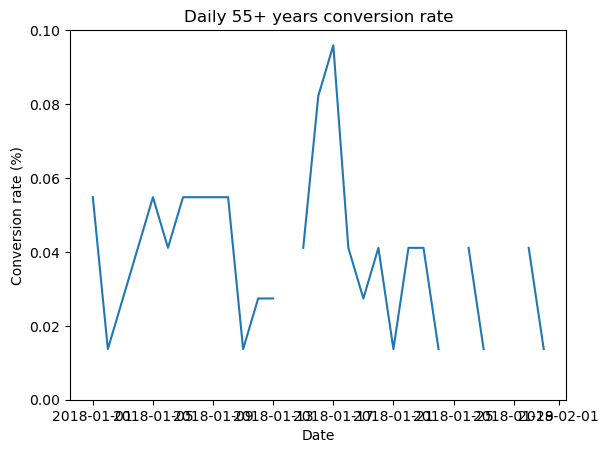

In [45]:
# using function made above
plotting(conv_rate_df)

Repeating for conversion rate across time for different marketing channels

In [46]:
# segregating subscribers by time and marketing channels
subscribers = marketing[marketing['converted'] == True].groupby(['date_served', 'marketing_channel'])['user_id'].nunique()

conv_rate = subscribers * 100/total
print(conv_rate)

date_served  marketing_channel
2018-01-01   Email                0.013710
             Facebook             0.109679
             House Ads            0.219358
             Instagram            0.109679
             Push                 0.041130
                                    ...   
2018-01-31   Email                0.013710
             Facebook             0.082259
             House Ads            0.082259
             Instagram            0.041130
             Push                 0.027420
Name: user_id, Length: 153, dtype: float64


In [47]:
# unstacking to plot
conv_rate_df = pd.DataFrame(conv_rate.unstack(level=1))

conv_rate_df.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,0.01371,0.109679,0.219358,0.109679,0.04113
2018-01-02,0.05484,0.082259,0.233068,0.109679,0.02742
2018-01-03,NaN,0.068549,0.233068,0.150809,0.04113
2018-01-04,0.01371,0.123389,0.205648,0.109679,0.02742
2018-01-05,0.01371,0.095969,0.274198,0.150809,0.01371


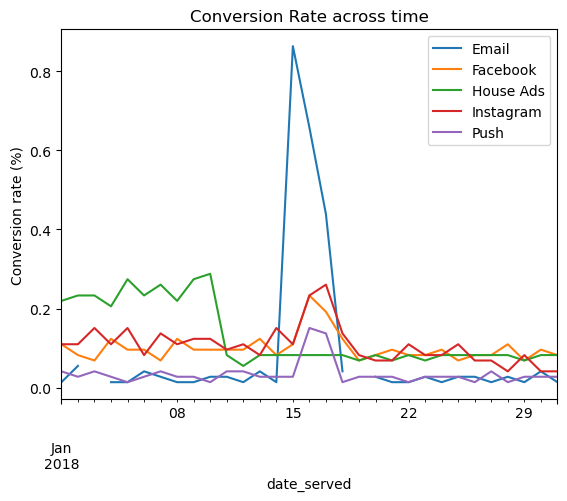

In [48]:
conv_rate_df.plot()

plt.title('Conversion Rate across time')
plt.ylabel('Conversion rate (%)')
plt.legend(loc='upper right', labels = conv_rate_df.columns.values)
plt.show()

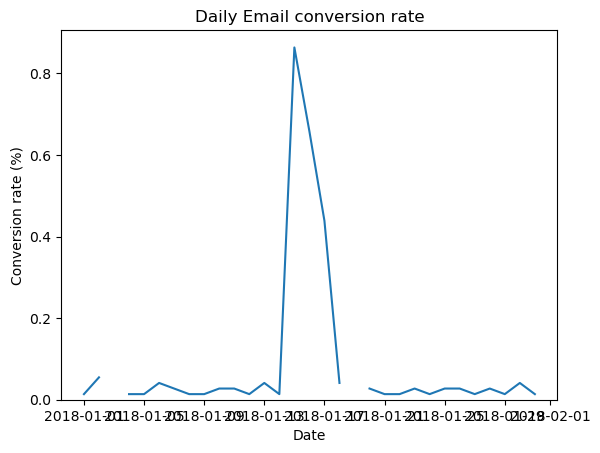

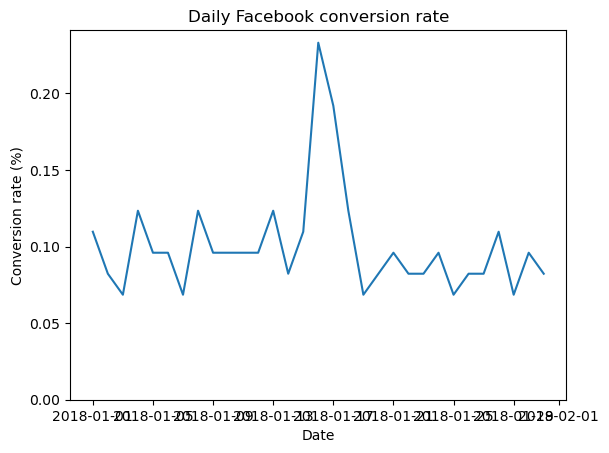

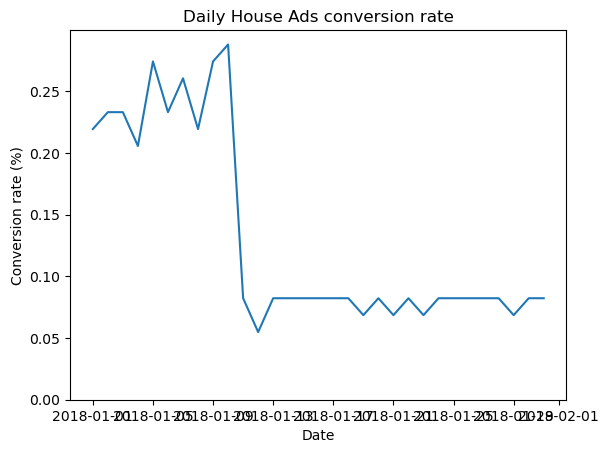

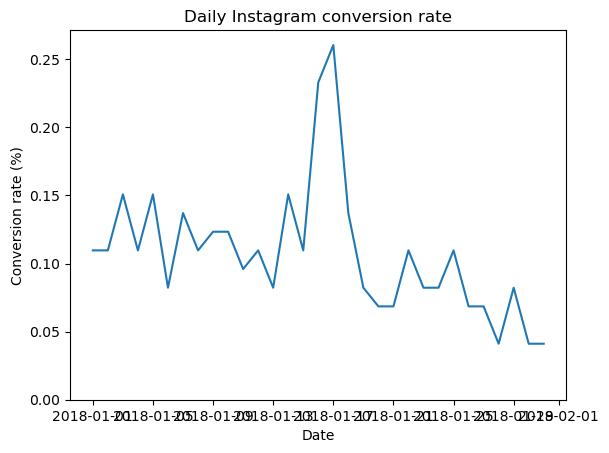

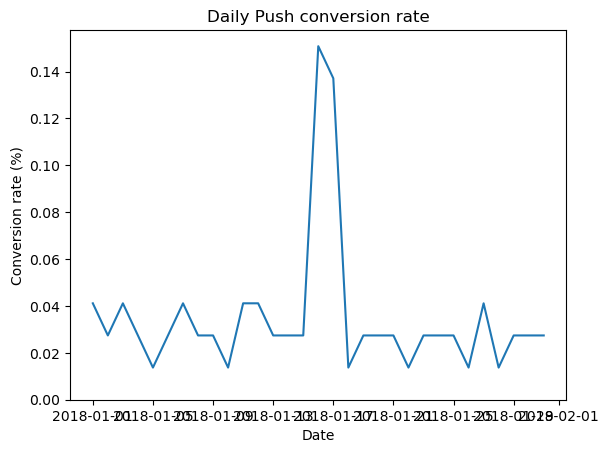

In [49]:
# breaking into multiple plots
plotting(conv_rate_df)

### Retention
Let's take a look at retention across age groups and marketing channels

In [52]:
# retention calculation
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
retained = marketing[marketing['is_retained'] == True].groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

retention = retained * 100 / subscribers
print(retention)

age_group    marketing_channel
0-18 years   Email                3.054187
             Facebook             3.940887
             House Ads            6.600985
             Instagram            3.448276
             Push                 2.857143
19-24 years  Email                3.546798
             Facebook             7.093596
             House Ads            9.064039
             Instagram            7.487685
             Push                 1.871921
24-30 years  Email                5.123153
             Facebook             4.334975
             House Ads            7.192118
             Instagram            4.729064
             Push                 2.463054
30-36 years  Email                0.492611
             Facebook             2.068966
             House Ads            5.221675
             Instagram            2.167488
             Push                 0.492611
36-45 years  Email                0.394089
             Facebook             2.266010
             House Ads 

In [53]:
# unstacking to plot
retention_pd = pd.DataFrame(retention.unstack(level=1))

retention_pd.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,3.054187,3.940887,6.600985,3.448276,2.857143
19-24 years,3.546798,7.093596,9.064039,7.487685,1.871921
24-30 years,5.123153,4.334975,7.192118,4.729064,2.463054
30-36 years,0.492611,2.068966,5.221675,2.167488,0.492611
36-45 years,0.394089,2.266010,4.039409,1.871921,1.379310


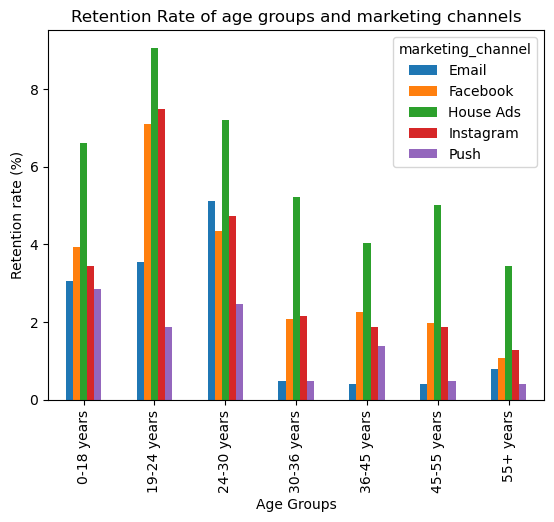

In [54]:
# plot this
retention_pd.plot(kind='bar')
plt.title('Retention Rate of age groups and marketing channels')
plt.ylabel('Retention rate (%)')
plt.xlabel('Age Groups')
plt.show()

We can easily conclude in all age groups house ads have the highest retention in 2018 January. Of course with a larger dataset which runs for a longer duration we will be able to see different patterns emerge.